# <center>Telco Customer Churn

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [43]:

category_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


target = 'Churn'

ID_col = 'customerID'


assert len(category_cols) + len(numeric_cols) + 2 == tcc.shape[1]

In [44]:
tcc['TotalCharges']= tcc['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
tcc['MonthlyCharges'] = tcc['MonthlyCharges'].astype(float)

In [45]:
tcc['TotalCharges'] = tcc['TotalCharges'].fillna(0)

In [46]:
tcc['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tcc['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [47]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

In [49]:
ColumnTransformer?

In [50]:
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [63]:
category_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [51]:
preprocess_col = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols) #ignore numeric variables
])

In [52]:
preprocess_col.fit(tcc)

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('num', 'passthrough',
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

In [53]:
pd.DataFrame(preprocess_col.transform(tcc))

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,29.85,29.85
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,84.80,1990.50
7039,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.0,103.20,7362.90
7040,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,29.60,346.45
7041,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,74.40,306.60


In [54]:
preprocess_col.named_transformers_

{'cat': OneHotEncoder(drop='if_binary'),
 'num': 'passthrough',
 'remainder': 'drop'}

In [55]:
#check OneHotEncoder
preprocess_col.named_transformers_['cat']

OneHotEncoder(drop='if_binary')

In [64]:
def cate_colName(Transformer, category_clos, drop = 'if_binary'):
    """
    :param Transformer: one hot transformer
    :param category_cols: discrete variables
    :param drop: parameter 'drop'
    
    """
    cate_cols_new = []
    col_value = Transformer.categories_
    
    for i,j in enumerate(category_clos):
        if(drop == 'if_binary') & (len(col_value[i]) == 2):
            cate_cols_new.append(j)
        else:
            for f in col_value[i]:
                feature_name = j + '_' + f
                cate_cols_new.append(feature_name)
    return(cate_cols_new)

In [65]:
category_cols_new = cate_colName(preprocess_col.named_transformers_['cat'], category_cols)

In [66]:
# all columns name
cols_new = category_cols_new + numeric_cols

In [67]:
#final updated dataframe
pd.DataFrame(preprocess_col.transform(tcc), columns=cols_new)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,29.85,29.85
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,84.80,1990.50
7039,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.0,103.20,7362.90
7040,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,29.60,346.45
7041,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,74.40,306.60


In [68]:
ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', preprocessing.StandardScaler(), numeric_cols)
])

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('num', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

In [69]:
ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans'), numeric_cols)
])

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('num',
                                 KBinsDiscretizer(encode='ordinal', n_bins=3,
                                                  strategy='kmeans'),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

## Logistics Regression

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [71]:
train, test = train_test_split(tcc, test_size=0.3, random_state=21)

In [72]:
tcc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


### 2.逻辑回归模型训练

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [74]:
X_train = train.drop(columns=[ID_col, target]).copy()
y_train = train['Churn'].copy()
X_test = test.drop(columns=[ID_col, target]).copy()
y_test = test['Churn'].copy()

In [75]:

assert len(category_cols) + len(numeric_cols) == X_train.shape[1]


logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])


logistic_model = LogisticRegression(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)

In [76]:
logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                          

In [77]:
logistic_pipe.score(X_train, y_train)

0.808316430020284

In [78]:
logistic_pipe.score(X_test, y_test)

0.7931850449597728

In [79]:
def result_df(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun(model.predict(X_train), y_train))
        res_test.append(fun(model.predict(X_test), y_test)) 
        col_name.append(fun.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

In [80]:
result_df(logistic_pipe, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.808316,0.667263,0.565580,0.612228,0.758474
test_eval,0.793185,0.615071,0.549091,0.580211,0.731087


## Optimization 

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:

assert len(category_cols) + len(numeric_cols) == X_train.shape[1]


logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])


logistic_model = LogisticRegression(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)

In [89]:
logistic_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                    ['gender', 'SeniorCitizen', 'Partner',
                                     'Dependents', 'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod']),
                                   ('num', 'passthrough',
                                    ['tenure', 'MonthlyCharges', 'TotalCharges'])])),
  ('logisticregression', LogisticRegression(max_iter=100000000))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                

In [90]:
logistic_param = [
    {'logisticregression__penalty': ['l1'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['saga']}, 
    {'logisticregression__penalty': ['l2'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}, 
    {'logisticregression__penalty': ['elasticnet'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__l1_ratio': np.arange(0.1, 1.1, 0.1).tolist(), 'logisticregression__solver': ['saga']}
]

In [91]:

logistic_search = GridSearchCV(estimator = logistic_pipe,
                               param_grid = logistic_param,
                               n_jobs = 12)

In [92]:
import time

In [ ]:

s = time.time()
logistic_search.fit(X_train, y_train)
print(time.time()-s, "s")

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [ ]:
logistic_search.best_score_

In [ ]:
logistic_search.best_params_

In [ ]:

logistic_search.best_estimator_

In [ ]:

result_df(logistic_search.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:

logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])


logistic_model = LogisticRegression(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)


logistic_param = [
    {'logisticregression__penalty': ['l1'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['saga']}, 
    {'logisticregression__penalty': ['l2'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}, 
    {'logisticregression__penalty': ['elasticnet'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__l1_ratio': np.arange(0.1, 1.1, 0.1).tolist(), 'logisticregression__solver': ['saga']}
]


logistic_search_f1 = GridSearchCV(estimator = logistic_pipe,
                                  param_grid = logistic_param,
                                  scoring='f1',
                                  n_jobs = 12)

s = time.time()
logistic_search_f1.fit(X_train, y_train)
print(time.time()-s, "s")

In [ ]:
logistic_search_f1.best_score_

In [ ]:
logistic_search_f1.best_params_

In [ ]:
result_df(logistic_search_f1.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
logistic_pipe.get_params()

In [140]:

logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

num_pre = ['passthrough', preprocessing.StandardScaler(), preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')]


logistic_model = LogisticRegression(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)


logistic_param = [
    {'columntransformer__num':num_pre, 'logisticregression__penalty': ['l1'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['saga']}, 
    {'columntransformer__num':num_pre, 'logisticregression__penalty': ['l2'], 'logisticregression__C': np.arange(0.1, 2.1, 0.1).tolist(), 'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}, 
]


logistic_search = GridSearchCV(estimator = logistic_pipe,
                                  param_grid = logistic_param,
                                  n_jobs = 12)

s = time.time()
logistic_search.fit(X_train, y_train)
print(time.time()-s, "s")

86.78103947639465 s


In [141]:
logistic_search.best_score_

0.8044624746450305

In [142]:
logistic_search.best_params_

{'columntransformer__num': 'passthrough',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [143]:

result_df(logistic_search.best_estimator_, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.805477,0.667286,0.544352,0.599582,0.755672
test_eval,0.793185,0.619958,0.530909,0.571988,0.731416


In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

In [158]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [74]:
class logit_threshold(BaseEstimator, TransformerMixin):
    
    def __init__(self, penalty='l2', C=1.0, max_iter=1e8, solver='lbfgs', l1_ratio=None, class_weight=None, thr=0.5):
        self.penalty = penalty
        self.C = C
        self.max_iter = max_iter
        self.solver = solver
        self.l1_ratio = l1_ratio
        self.thr = thr
        self.class_weight = class_weight
        
    def fit(self, X, y):
        clf = LogisticRegression(penalty = self.penalty, 
                                 C = self.C, 
                                 solver = self.solver, 
                                 l1_ratio = self.l1_ratio,
                                 class_weight=self.class_weight, 
                                 max_iter=self.max_iter)
        clf.fit(X, y)
        self.coef_ = clf.coef_
        self.clf = clf
        return self
        
    def predict(self, X):
        res = (self.clf.predict_proba(X)[:, 1]>=self.thr) * 1
        return res

In [75]:
np.random.seed(24)
X = np.random.normal(0, 1, size=(1000, 2))
y = np.array(X[:,0]+X[:, 1]**2 < 1.5, int)

In [76]:
clf = LogisticRegression()

In [77]:
clf.fit(X, y)

LogisticRegression()

In [78]:

res1 = (clf.predict_proba(X)[:, 1] >= 0.4) * 1

In [79]:

clf_thr = logit_threshold(thr=0.4)

In [80]:
clf_thr.fit(X, y)

logit_threshold(thr=0.4)

In [81]:
res2 = clf_thr.predict(X)

In [82]:
(res1 != res2).sum()

0

In [146]:

logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

num_pre = ['passthrough', preprocessing.StandardScaler(), preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')]

logistic_model = logit_threshold(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)

logistic_param = [
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l1'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['saga']}, 
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l2'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}, 
]


logistic_search_f1 = GridSearchCV(estimator = logistic_pipe,
                                  param_grid = logistic_param,
                                  scoring='f1',
                                  n_jobs = 12)

s = time.time()
logistic_search_f1.fit(X_train, y_train)
print(time.time()-s, "s")

369.4163067340851 s


In [147]:
logistic_search_f1.best_score_

0.6341624667020883

In [148]:
logistic_search_f1.best_params_

{'columntransformer__num': 'passthrough',
 'logit_threshold__C': 0.1,
 'logit_threshold__penalty': 'l2',
 'logit_threshold__solver': 'lbfgs',
 'logit_threshold__thr': 0.30000000000000004}

In [149]:

result_df(logistic_search_f1.best_estimator_, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.772617,0.554817,0.759666,0.641280,0.726672
test_eval,0.762423,0.531496,0.736364,0.617378,0.712084


In [26]:
y = tcc['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')

Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


In [29]:

logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

num_pre = ['passthrough', preprocessing.StandardScaler(), preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')]


logistic_model = logit_threshold(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)


cw_l = [None, 'balanced']
#cw_l.extend([{1: x} for x in np.arange(1, 4, 0.2)])
logistic_param = [
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l1'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['saga'], 'logit_threshold__class_weight':cw_l}, 
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l2'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'], 'logit_threshold__class_weight':cw_l}, 
]


logistic_search_f1 = GridSearchCV(estimator = logistic_pipe,
                                  param_grid = logistic_param,
                                  scoring='f1',
                                  n_jobs = 12)

s = time.time()
logistic_search_f1.fit(X_train, y_train)
print(time.time()-s, "s")

737.595550775528 s


In [31]:
logistic_search_f1.best_score_

0.6341624667020883

In [32]:
logistic_search_f1.best_params_

{'columntransformer__num': 'passthrough',
 'logit_threshold__C': 0.1,
 'logit_threshold__class_weight': None,
 'logit_threshold__penalty': 'l2',
 'logit_threshold__solver': 'lbfgs',
 'logit_threshold__thr': 0.30000000000000004}

In [33]:

result_df(logistic_search_f1.best_estimator_, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.772617,0.554817,0.759666,0.641280,0.726672
test_eval,0.762423,0.531496,0.736364,0.617378,0.712084


In [85]:

logistic_pre = ColumnTransformer([
    ('cat', preprocessing.OneHotEncoder(drop='if_binary'), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

num_pre = ['passthrough', preprocessing.StandardScaler(), preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')]


logistic_model = logit_threshold(max_iter=int(1e8))


logistic_pipe = make_pipeline(logistic_pre, logistic_model)


cw_l = [None, 'balanced']
#cw_l.extend([{1: x} for x in np.arange(1, 4, 0.2)])
logistic_param = [
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l1'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['saga'], 'logit_threshold__class_weight':cw_l}, 
    {'columntransformer__num':num_pre, 'logit_threshold__thr': np.arange(0.1, 1, 0.1).tolist(), 'logit_threshold__penalty': ['l2'], 'logit_threshold__C': np.arange(0.1, 1.1, 0.1).tolist(), 'logit_threshold__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'], 'logit_threshold__class_weight':cw_l}, 
]


logistic_search = GridSearchCV(estimator = logistic_pipe,
                               param_grid = logistic_param,
                               scoring='accuracy',
                               n_jobs = 12)

s = time.time()
logistic_search.fit(X_train, y_train)
print(time.time()-s, "s")


result_df(logistic_search.best_estimator_, X_train, y_train, X_test, y_test)

737.222731590271 s


,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.808925,0.669973,0.563306,0.612026,0.759614
test_eval,0.793658,0.616803,0.547273,0.579961,0.731786


In [86]:
logistic_search.best_params_

{'columntransformer__num': 'passthrough',
 'logit_threshold__C': 0.30000000000000004,
 'logit_threshold__class_weight': None,
 'logit_threshold__penalty': 'l2',
 'logit_threshold__solver': 'lbfgs',
 'logit_threshold__thr': 0.5}

In [105]:
coe = logistic_search.best_estimator_.named_steps['logit_threshold'].coef_
coe = coe.flatten()
coe

array([-3.64734497e-02,  2.97225123e-01, -6.96677065e-02, -2.11536083e-01,
       -3.59041883e-01, -3.16598442e-01,  1.96605064e-01, -4.24434409e-02,
       -3.93451080e-01,  3.65505701e-01, -1.34491440e-01,  1.88033447e-01,
       -1.34491440e-01, -2.15978826e-01,  1.48635094e-02, -1.34491440e-01,
       -4.28088885e-02,  3.09582859e-02, -1.34491440e-01, -5.89036649e-02,
        1.53753023e-01, -1.34491440e-01, -1.81698402e-01, -1.31620667e-01,
       -1.34491440e-01,  1.03675288e-01, -1.14052749e-01, -1.34491440e-01,
        8.61073700e-02,  5.32238806e-01, -1.63533154e-01, -5.31142471e-01,
        3.89129562e-01, -9.62838286e-02, -1.82584235e-01,  2.82335761e-01,
       -1.65904515e-01, -6.68822855e-02,  1.00859554e-03,  3.84181240e-04])

In [92]:

tf = logistic_search.best_estimator_.named_steps['columntransformer'].named_transformers_['cat']
tf

OneHotEncoder(drop='if_binary')

In [106]:

category_cols_new = cate_colName(tf, category_cols)


cols_new = category_cols_new + numeric_cols


assert len(cols_new) == len(coe)

In [107]:

weights = pd.Series(coe, index=cols_new)

In [108]:
weights

gender                                    -0.036473
SeniorCitizen                              0.297225
Partner                                   -0.069668
Dependents                                -0.211536
PhoneService                              -0.359042
MultipleLines_No                          -0.316598
MultipleLines_No phone service             0.196605
MultipleLines_Yes                         -0.042443
InternetService_DSL                       -0.393451
InternetService_Fiber optic                0.365506
InternetService_No                        -0.134491
OnlineSecurity_No                          0.188033
OnlineSecurity_No internet service        -0.134491
OnlineSecurity_Yes                        -0.215979
OnlineBackup_No                            0.014864
OnlineBackup_No internet service          -0.134491
OnlineBackup_Yes                          -0.042809
DeviceProtection_No                        0.030958
DeviceProtection_No internet service      -0.134491
DeviceProtec

然后可视化展示取值最大的10个自变量系数与取值最小的10个自变量系数：

<AxesSubplot:>

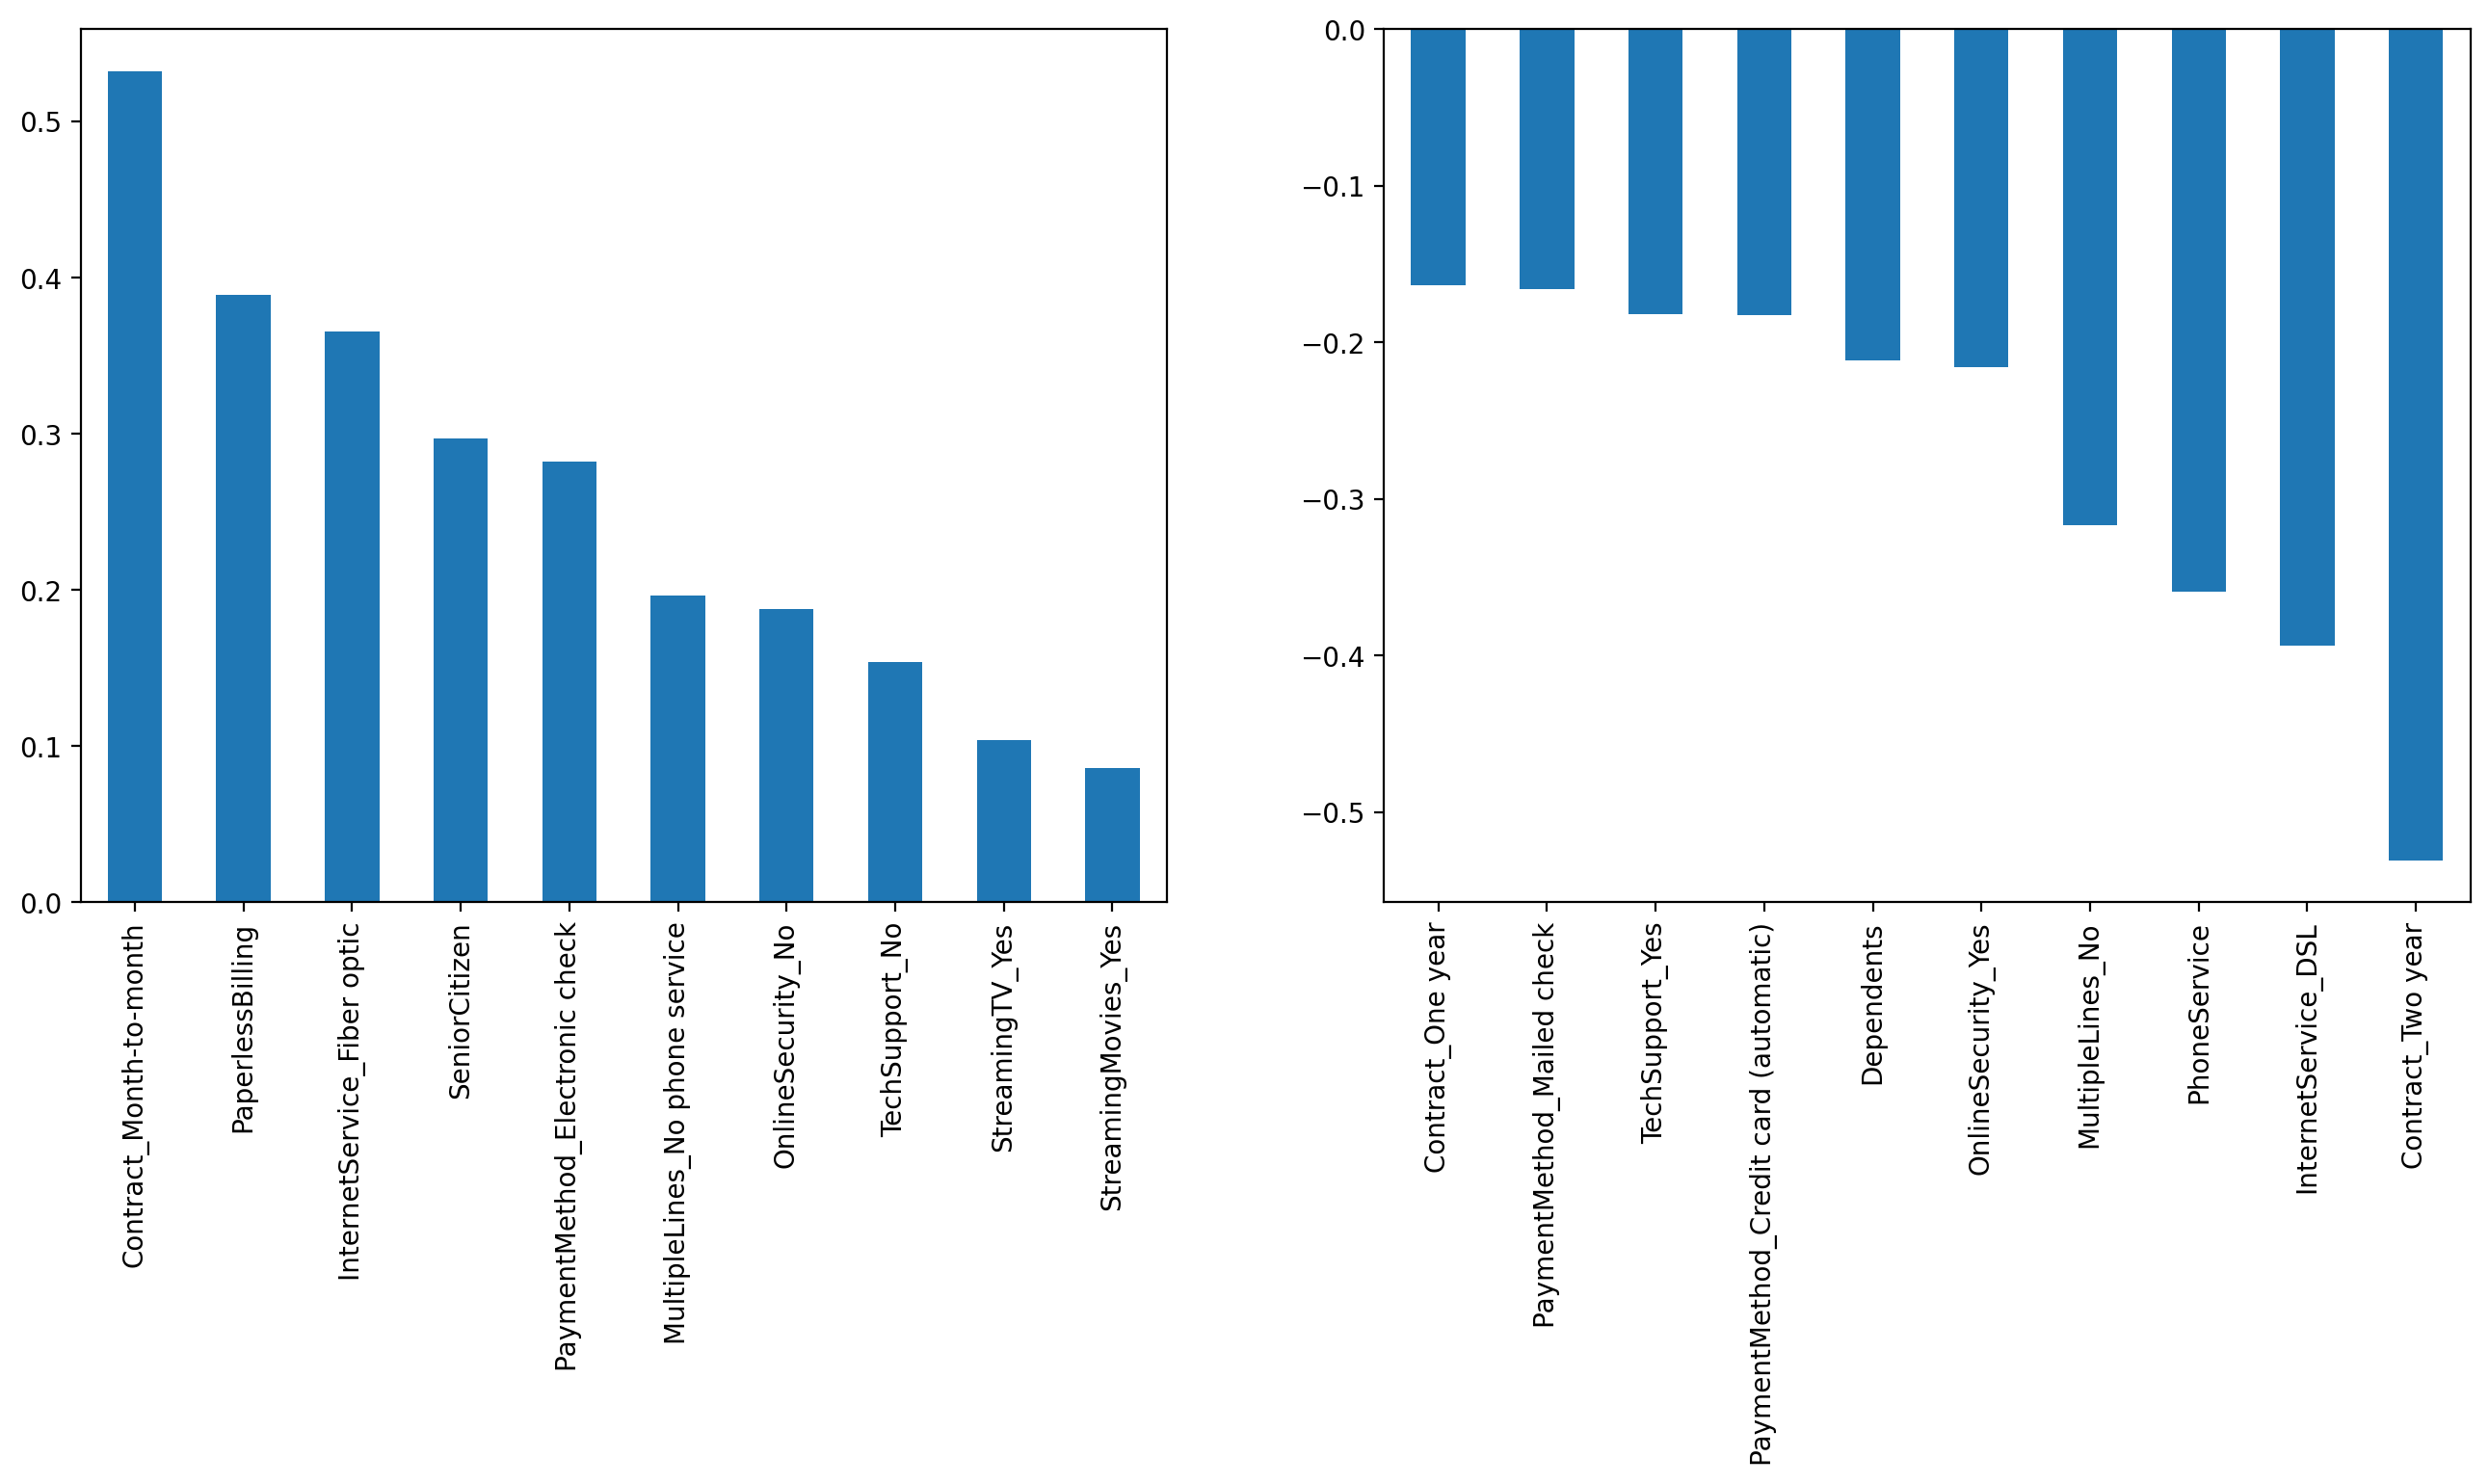

In [113]:
plt.figure(figsize=(16, 6), dpi=200)


plt.subplot(121)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

plt.subplot(122)
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

In [125]:
weights['Contract_Month-to-month'], weights['SeniorCitizen']

(0.5322388059587707, 0.29722512309644633)

In [129]:
weights[numeric_cols]

tenure           -0.066882
MonthlyCharges    0.001009
TotalCharges      0.000384
dtype: float64

In [130]:
# 导入决策树评估器
from sklearn.tree import DecisionTreeClassifier

# 设置转化器流
tree_pre = ColumnTransformer([
    ('cat', preprocessing.OrdinalEncoder(), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

# 实例化决策树评估器
tree_model = DecisionTreeClassifier()

# 设置机器学习流
tree_pipe = make_pipeline(tree_pre, tree_model)

In [131]:
# 模型训练
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                    

In [132]:
# 计算预测结果
result_df(tree_pipe, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.998986,1.000000,0.996209,0.998101,0.999309
test_eval,0.743493,0.507143,0.516364,0.511712,0.667931


In [216]:
# 设置转化器流
tree_pre = ColumnTransformer([
    ('cat', preprocessing.OrdinalEncoder(), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

# 实例化决策树评估器
tree_model = DecisionTreeClassifier()

# 设置机器学习流
tree_pipe = make_pipeline(tree_pre, tree_model)

In [217]:
# tree_pipe.get_params()

In [218]:
# 构造包含阈值的参数空间
tree_param = {'decisiontreeclassifier__ccp_alpha': np.arange(0, 1, 0.1).tolist(),
              'decisiontreeclassifier__max_depth': np.arange(2, 8, 1).tolist(), 
              'decisiontreeclassifier__min_samples_split': np.arange(2, 5, 1).tolist(), 
              'decisiontreeclassifier__min_samples_leaf': np.arange(1, 4, 1).tolist(), 
              'decisiontreeclassifier__max_leaf_nodes':np.arange(6,10, 1).tolist()}

In [219]:
# 实例化网格搜索评估器
tree_search = GridSearchCV(estimator = tree_pipe,
                           param_grid = tree_param,
                           n_jobs = 12)

In [220]:
# 在训练集上进行训练
s = time.time()
tree_search.fit(X_train, y_train)
print(time.time()-s, "s")

30.371087312698364 s


In [138]:
# 查看验证集准确率均值
tree_search.best_score_

0.79026369168357

In [139]:
# 查看最优参数组
tree_search.best_params_

{'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_leaf_nodes': 8,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [140]:
# 计算预测结果
result_df(tree_search.best_estimator_, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.791278,0.645582,0.487491,0.555508,0.736874
test_eval,0.795078,0.648855,0.463636,0.540827,0.738672


In [171]:
fi = tree_search.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_
fi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11262871, 0.15756862, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.5955054 , 0.        ,
       0.        , 0.10555534, 0.02874193, 0.        ])

In [178]:
col_names = category_cols + numeric_cols

In [179]:
col_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [180]:
feature_importances = pd.Series(fi, index=col_names)

In [181]:
feature_importances

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.112629
OnlineSecurity      0.157569
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.595505
PaperlessBilling    0.000000
PaymentMethod       0.000000
tenure              0.105555
MonthlyCharges      0.028742
TotalCharges        0.000000
dtype: float64

<AxesSubplot:>

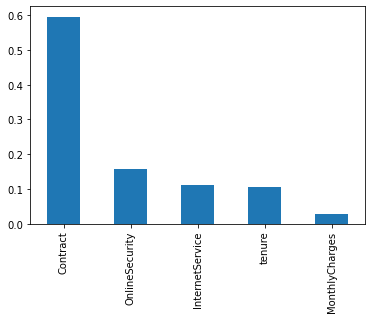

In [174]:
feature_importances.sort_values(ascending = False)[:5].plot(kind='bar')

[Text(1578.1818181818182, 830.5, 'X[13] <= 0.5\ngini = 0.392\nsamples = 4930\nvalue = [3611, 1319]'),
 Text(1127.2727272727273, 679.5, 'X[7] <= 0.5\ngini = 0.491\nsamples = 2701\nvalue = [1535, 1166]'),
 Text(901.8181818181819, 528.5, 'X[16] <= 7.5\ngini = 0.499\nsamples = 1860\nvalue = [900, 960]'),
 Text(450.90909090909093, 377.5, 'X[6] <= 0.5\ngini = 0.454\nsamples = 751\nvalue = [262, 489]'),
 Text(225.45454545454547, 226.5, 'gini = 0.5\nsamples = 316\nvalue = [157, 159]'),
 Text(676.3636363636364, 226.5, 'gini = 0.366\nsamples = 435\nvalue = [105, 330]'),
 Text(1352.7272727272727, 377.5, 'X[6] <= 0.5\ngini = 0.489\nsamples = 1109\nvalue = [638, 471]'),
 Text(1127.2727272727273, 226.5, 'gini = 0.332\nsamples = 295\nvalue = [233, 62]'),
 Text(1578.1818181818182, 226.5, 'X[16] <= 16.5\ngini = 0.5\nsamples = 814\nvalue = [405, 409]'),
 Text(1352.7272727272727, 75.5, 'gini = 0.467\nsamples = 245\nvalue = [91, 154]'),
 Text(1803.6363636363637, 75.5, 'gini = 0.495\nsamples = 569\nvalue =

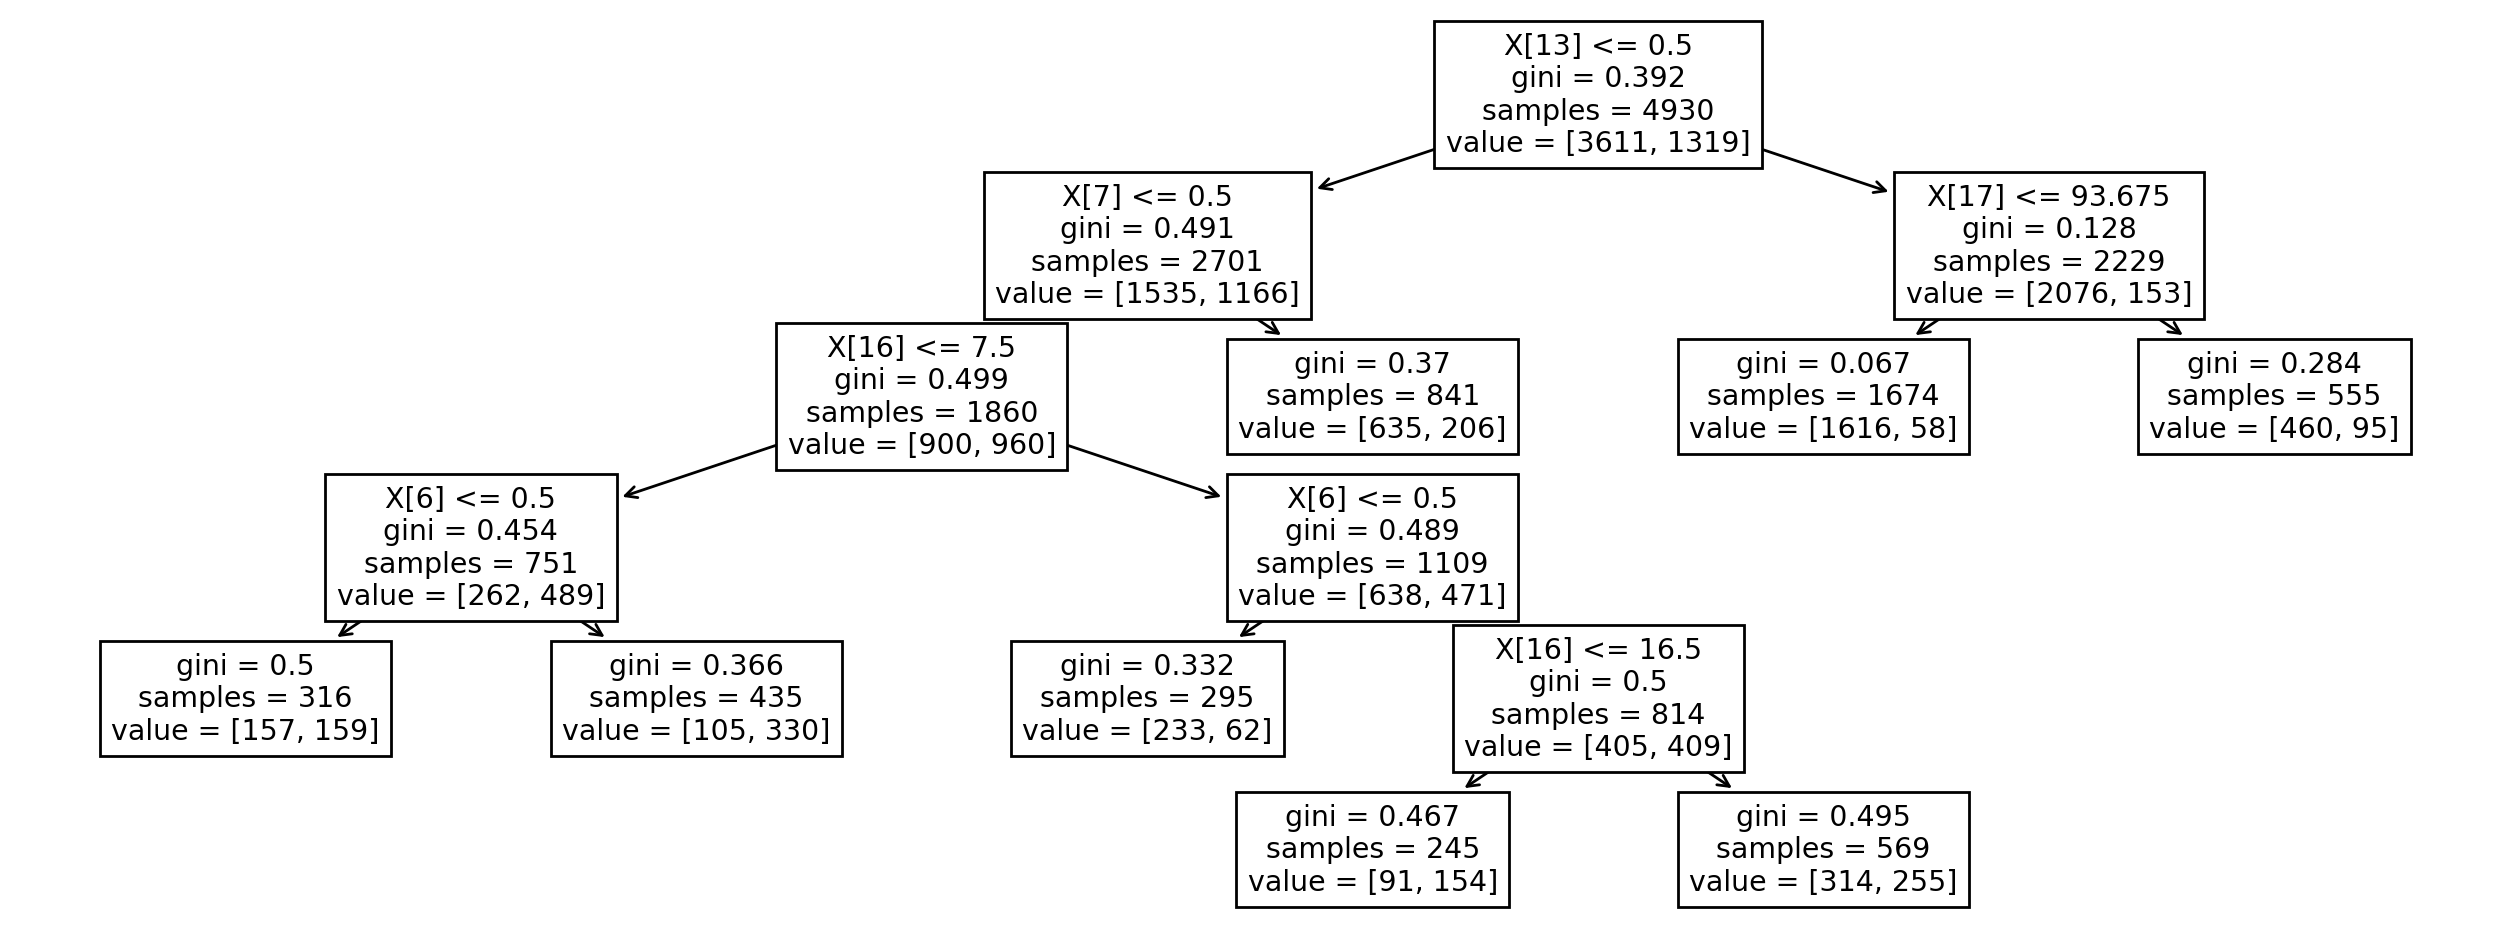

In [170]:
plt.figure(figsize=(16, 6), dpi=200)
tree.plot_tree(tree_search.best_estimator_.named_steps['decisiontreeclassifier'])

In [177]:
58/1674

0.03464755077658303

In [228]:
cat_rules = tree_search.best_estimator_.named_steps['columntransformer'].named_transformers_['cat'].categories_

In [235]:
cat_rules

[array(['Female', 'Male'], dtype=object),
 array([0, 1], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [232]:
col_names[13], cat_rules[13]

('Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object))

In [234]:
col_names[17]

'MonthlyCharges'

In [210]:
(col_names[7], col_names[16], col_names[6])

('OnlineSecurity', 'tenure', 'InternetService')